C:\Users\apazh\AppData\Local\Temp/ipykernel_24324/3604730327.py:49: RuntimeWarning: overflow encountered in double_scalars
  henrys_law_constant = henrys_law_constant * np.exp(delta_ln_k)


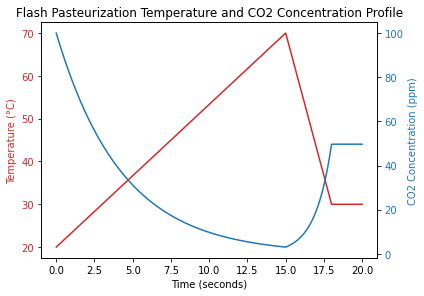

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def flash_pasteurization_temperature_profile(t, T0, Tp, tp, Tc, tc, Ts, ts):
    """
    Calculate the temperature profile during flash pasteurization.

    Parameters:
    - t: Time array (in seconds)
    - T0: Initial temperature
    - Tp: Pasteurization temperature
    - tp: Duration of pasteurization (in seconds)
    - Tc: Cooling temperature
    - tc: Duration of cooling (in seconds)
    - Ts: Stabilization temperature
    - ts: Duration of stabilization (in seconds)

    Returns:
    - Temperature profile array
    """
    temperature = np.piecewise(t,
        [t < 0, (0 <= t) & (t <= tp), (tp < t) & (t <= tp + tc), t > tp + tc],
        [T0, lambda t: T0 + ((Tp - T0) / tp) * t, lambda t: Tp - ((Tp - Tc) / tc) * (t - tp), Tc]
    )
    return temperature
# Time array (adjust based on the specific flash pasteurization scenario)
time = np.linspace(0, 20, 1000)

def calculate_CO2_concentration(initial_concentration, temperature_profile, henrys_law_constant, temperature_coefficient):
    """
    Calculate the CO2 concentration profile based on Henry's Law.

    Parameters:
    - initial_concentration: Initial concentration of CO2 in ppm
    - temperature_profile: Temperature profile array in Celsius
    - henrys_law_constant: Henry's Law constant at the initial temperature
    - temperature_coefficient: Temperature coefficient for Henry's Law constant

    Returns:
    - CO2 concentration profile array
    """
    CO2_concentration_profile = []

    for temperature in temperature_profile:
        # Calculate the change in Henry's Law constant based on the temperature coefficient
        delta_ln_k = temperature_coefficient * (temperature - temperature_profile[0])

        # Calculate the new Henry's Law constant
        henrys_law_constant = henrys_law_constant * np.exp(delta_ln_k)

        # Calculate CO2 concentration based on Henry's Law
        CO2_concentration = initial_concentration * np.exp(-delta_ln_k)  # Directly use the exponential function

        CO2_concentration_profile.append(CO2_concentration)

    return CO2_concentration_profile

# Example usage:
initial_concentration_CO2 = 100  # Initial concentration of CO2 in ppm
henrys_law_constant_at_initial_temp = 3.3e-4  # Example Henry's Law constant at the initial temperature
temperature_coefficient = 0.07  # Example temperature coefficient for Henry's Law constant

# Calculate temperature profile
temperature_profile = flash_pasteurization_temperature_profile(
    time, initial_temperature, pasteurization_temperature, pasteurization_duration,
    cooling_temperature, cooling_duration, stabilization_temperature, stabilization_duration
)

# Calculate CO2 concentration profile
CO2_concentration_profile = calculate_CO2_concentration(
    initial_concentration_CO2, temperature_profile, henrys_law_constant_at_initial_temp, temperature_coefficient
)

# Plot the temperature profile and CO2 concentration
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(time, temperature_profile, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('CO2 Concentration (ppm)', color=color)  
ax2.plot(time, CO2_concentration_profile, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Flash Pasteurization Temperature and CO2 Concentration Profile')
plt.show()


C:\Users\apazh\AppData\Local\Temp/ipykernel_24324/3604730327.py:49: RuntimeWarning: overflow encountered in double_scalars
  henrys_law_constant = henrys_law_constant * np.exp(delta_ln_k)


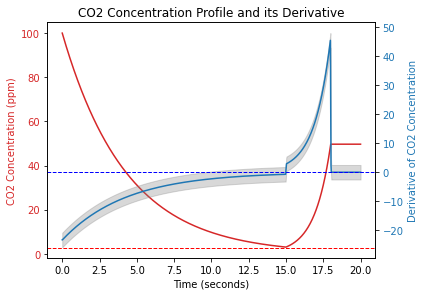

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# ... (Previous code for flash_pasteurization_temperature_profile and calculate_CO2_concentration)

# Example usage:
initial_concentration_CO2 = 100  # Initial concentration of CO2 in ppm
henrys_law_constant_at_initial_temp = 3.3e-4  # Example Henry's Law constant at the initial temperature
temperature_coefficient = 0.07  # Example temperature coefficient for Henry's Law constant

# Calculate temperature profile
temperature_profile = flash_pasteurization_temperature_profile(
    time, initial_temperature, pasteurization_temperature, pasteurization_duration,
    cooling_temperature, cooling_duration, stabilization_temperature, stabilization_duration
)

# Calculate CO2 concentration profile
CO2_concentration_profile = calculate_CO2_concentration(
    initial_concentration_CO2, temperature_profile, henrys_law_constant_at_initial_temp, temperature_coefficient
)

# Calculate the derivative of CO2 concentration profile
time_derivative = np.gradient(CO2_concentration_profile, time)

# Plot the CO2 concentration profile and its derivative
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('CO2 Concentration (ppm)', color=color)
ax1.plot(time, CO2_concentration_profile, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=2.5, color='red', linestyle='--', linewidth=1)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Derivative of CO2 Concentration', color=color)  
ax2.plot(time, time_derivative, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=0, color='blue', linestyle='--', linewidth=1)
error = 2.5
lower_bound = time_derivative + error
upper_bound = time_derivative - error
ax2.fill_between(time, lower_bound, upper_bound, color='gray', alpha=0.3, label='Allowable Error')


fig.tight_layout()  
plt.title('CO2 Concentration Profile and its Derivative')
plt.show()


C:\Users\apazh\AppData\Local\Temp/ipykernel_24324/3604730327.py:49: RuntimeWarning: overflow encountered in double_scalars
  henrys_law_constant = henrys_law_constant * np.exp(delta_ln_k)


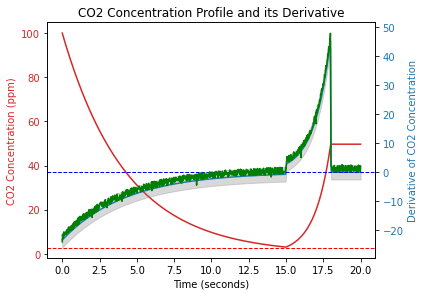

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# ... (Previous code for flash_pasteurization_temperature_profile and calculate_CO2_concentration)

# Example usage:
initial_concentration_CO2 = 100  # Initial concentration of CO2 in ppm
henrys_law_constant_at_initial_temp = 3.3e-4  # Example Henry's Law constant at the initial temperature
temperature_coefficient = 0.07  # Example temperature coefficient for Henry's Law constant

# Calculate temperature profile
temperature_profile = flash_pasteurization_temperature_profile(
    time, initial_temperature, pasteurization_temperature, pasteurization_duration,
    cooling_temperature, cooling_duration, stabilization_temperature, stabilization_duration
)

# Calculate CO2 concentration profile
CO2_concentration_profile = calculate_CO2_concentration(
    initial_concentration_CO2, temperature_profile, henrys_law_constant_at_initial_temp, temperature_coefficient
)

# Calculate the derivative of CO2 concentration profile
time_derivative = np.gradient(CO2_concentration_profile, time)

# Add or subtract a random number between 0 and 2.5 every 50 values in time_derivative
variation_interval = 50
random_variation = np.random.uniform(0, 2.5, len(time_derivative))
random_variation[::variation_interval] *= np.random.choice([-1, 1], size=len(random_variation)//variation_interval)

# Apply the random variation to time_derivative
time_derivative_with_variation = time_derivative + random_variation

# Plot the CO2 concentration profile and its derivative
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('CO2 Concentration (ppm)', color=color)
ax1.plot(time, CO2_concentration_profile, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=2.5, color='red', linestyle='--', linewidth=1)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Derivative of CO2 Concentration', color=color)  
ax2.plot(time, time_derivative, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=0, color='blue', linestyle='--', linewidth=1)
error = 2.5
lower_bound = time_derivative + error
upper_bound = time_derivative - error
ax2.fill_between(time, lower_bound, upper_bound, color='gray', alpha=0.3, label='Allowable Error')
ax2.plot(time, time_derivative_with_variation, color='green', label='Derivative with Variation')

fig.tight_layout()  
plt.title('CO2 Concentration Profile and its Derivative')
plt.show()
# Sample comparison within the bounds

C:\Users\apazh\AppData\Local\Temp/ipykernel_24324/3604730327.py:49: RuntimeWarning: overflow encountered in double_scalars
  henrys_law_constant = henrys_law_constant * np.exp(delta_ln_k)


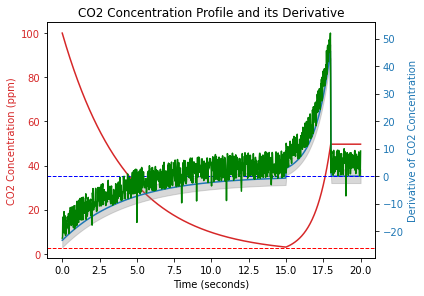

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# ... (Previous code for flash_pasteurization_temperature_profile and calculate_CO2_concentration)

# Example usage:
initial_concentration_CO2 = 100  # Initial concentration of CO2 in ppm
henrys_law_constant_at_initial_temp = 3.3e-4  # Example Henry's Law constant at the initial temperature
temperature_coefficient = 0.07  # Example temperature coefficient for Henry's Law constant

# Calculate temperature profile
temperature_profile = flash_pasteurization_temperature_profile(
    time, initial_temperature, pasteurization_temperature, pasteurization_duration,
    cooling_temperature, cooling_duration, stabilization_temperature, stabilization_duration
)

# Calculate CO2 concentration profile
CO2_concentration_profile = calculate_CO2_concentration(
    initial_concentration_CO2, temperature_profile, henrys_law_constant_at_initial_temp, temperature_coefficient
)

# Calculate the derivative of CO2 concentration profile
time_derivative = np.gradient(CO2_concentration_profile, time)

# Add or subtract a random number between 0 and 2.5 every 50 values in time_derivative
variation_interval = 50
random_variation = np.random.uniform(0, 10, len(time_derivative))
random_variation[::variation_interval] *= np.random.choice([-1, 1], size=len(random_variation)//variation_interval)

# Apply the random variation to time_derivative
time_derivative_with_variation = time_derivative + random_variation

# Plot the CO2 concentration profile and its derivative
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('CO2 Concentration (ppm)', color=color)
ax1.plot(time, CO2_concentration_profile, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=2.5, color='red', linestyle='--', linewidth=1)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Derivative of CO2 Concentration', color=color)  
ax2.plot(time, time_derivative, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=0, color='blue', linestyle='--', linewidth=1)
error = 2.5
lower_bound = time_derivative + error
upper_bound = time_derivative - error
ax2.fill_between(time, lower_bound, upper_bound, color='gray', alpha=0.3, label='Allowable Error')
ax2.plot(time, time_derivative_with_variation, color='green', label='Derivative with Variation')

valid_indices = np.where((time_derivative_with_variation >= lower_bound) & (time_derivative_with_variation <= upper_bound))[0]
ax2.plot(time[valid_indices], time_derivative_with_variation[valid_indices], color=color, label='Derivative with Variation')

fig.tight_layout()  
plt.title('CO2 Concentration Profile and its Derivative')
plt.show()
# Sample comparison outside the bounds